<a href="https://colab.research.google.com/github/Anshuzz/Prediction-of-Mycotoxin-Levels-in-Corn/blob/main/ML_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

file_path = "TASK-ML-INTERN.csv"
df = pd.read_csv(file_path)

df.info()
print(df.head())

missing_values = df.isnull().sum().sum()
print(f"Total missing values: {missing_values}")

spectral_data = df.iloc[:, 1:-1]

scaler = MinMaxScaler()
scaled_spectral_data = scaler.fit_transform(spectral_data)

df_scaled = pd.DataFrame(scaled_spectral_data, columns=spectral_data.columns)

df_scaled.insert(0, "hsi_id", df["hsi_id"])
df_scaled["vomitoxin_ppb"] = df["vomitoxin_ppb"]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB
           hsi_id         0         1         2         3         4         5  \
0  imagoai_corn_0  0.416181  0.396844  0.408985  0.372865  0.385293  0.365390   
1  imagoai_corn_1  0.415797  0.402956  0.402564  0.396014  0.397192  0.389634   
2  imagoai_corn_2  0.389023  0.371206  0.373098  0.373872  0.361056  0.349709   
3  imagoai_corn_3  0.468837  0.473255  0.462949  0.459335  0.461672  0.459824   
4  imagoai_corn_4  0.483352  0.487274  0.469153  0.487648  0.464026  0.451152   

          6         7         8  ...       439       440       441       442  \
0  0.355226  0.343350  0.344837  ...  0.710280  0.717482  0.715078  0.705379   
1  0.375671  0.363689  0.373883  ...  0.684011  0.697271  0.701995  0.696077   
2  0.333882  0.330841  0.328925  ...  0.683054  0.669286  0.663179  0.676165   
3  0.458194  0.427737

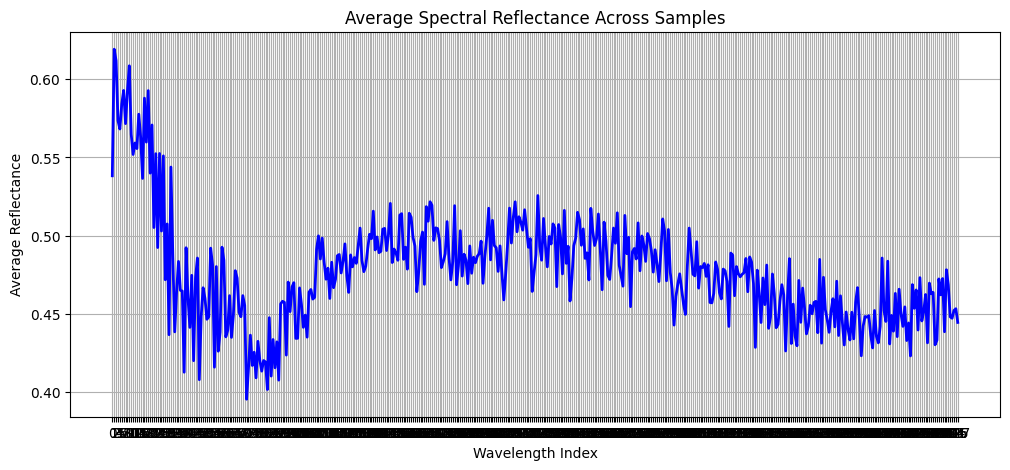

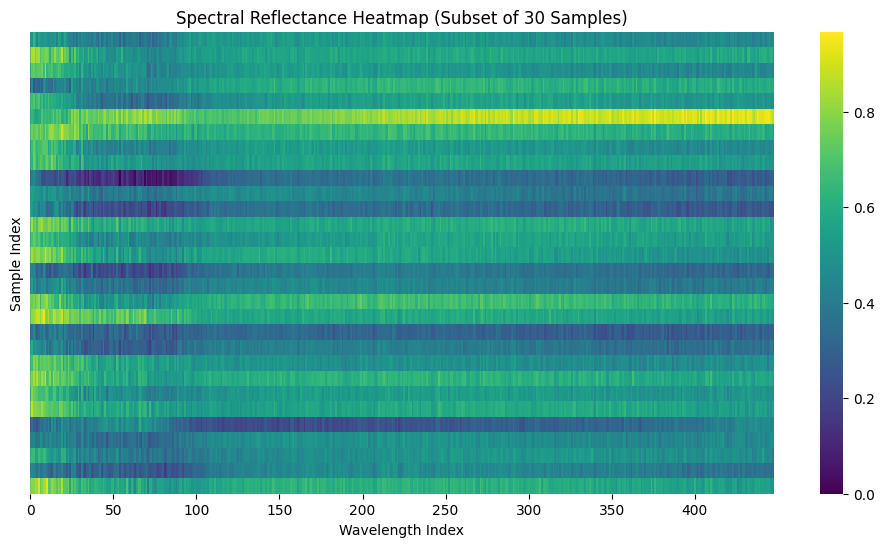

In [ ]:
mean_spectrum = df_scaled.iloc[:, 1:-1].mean()

plt.figure(figsize=(12, 5))
plt.plot(mean_spectrum.index, mean_spectrum.values, color='blue', linewidth=2)
plt.xlabel("Wavelength Index")
plt.ylabel("Average Reflectance")
plt.title("Average Spectral Reflectance Across Samples")
plt.grid(True)
plt.show()

subset_indices = np.random.choice(df_scaled.index, 30, replace=False)
subset_data = df_scaled.iloc[subset_indices, 1:-1]

plt.figure(figsize=(12, 6))
sns.heatmap(subset_data, cmap="viridis", xticklabels=50, yticklabels=False)
plt.xlabel("Wavelength Index")
plt.ylabel("Sample Index")
plt.title("Spectral Reflectance Heatmap (Subset of 30 Samples)")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df_scaled.iloc[:, 1:-1]
y = df_scaled["vomitoxin_ppb"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)
}

results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

df_results = pd.DataFrame(results).T
df_results


Training Random Forest...
Training XGBoost...
Training Neural Network...


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,MAE,RMSE,R²
Random Forest,3765.056800,11483.805983,0.528221
XGBoost,3972.927882,12996.288925,0.395766
Neural Network,3446.275347,11039.013980,0.564059
